In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

<AxesSubplot:xlabel='Profession', ylabel='count'>

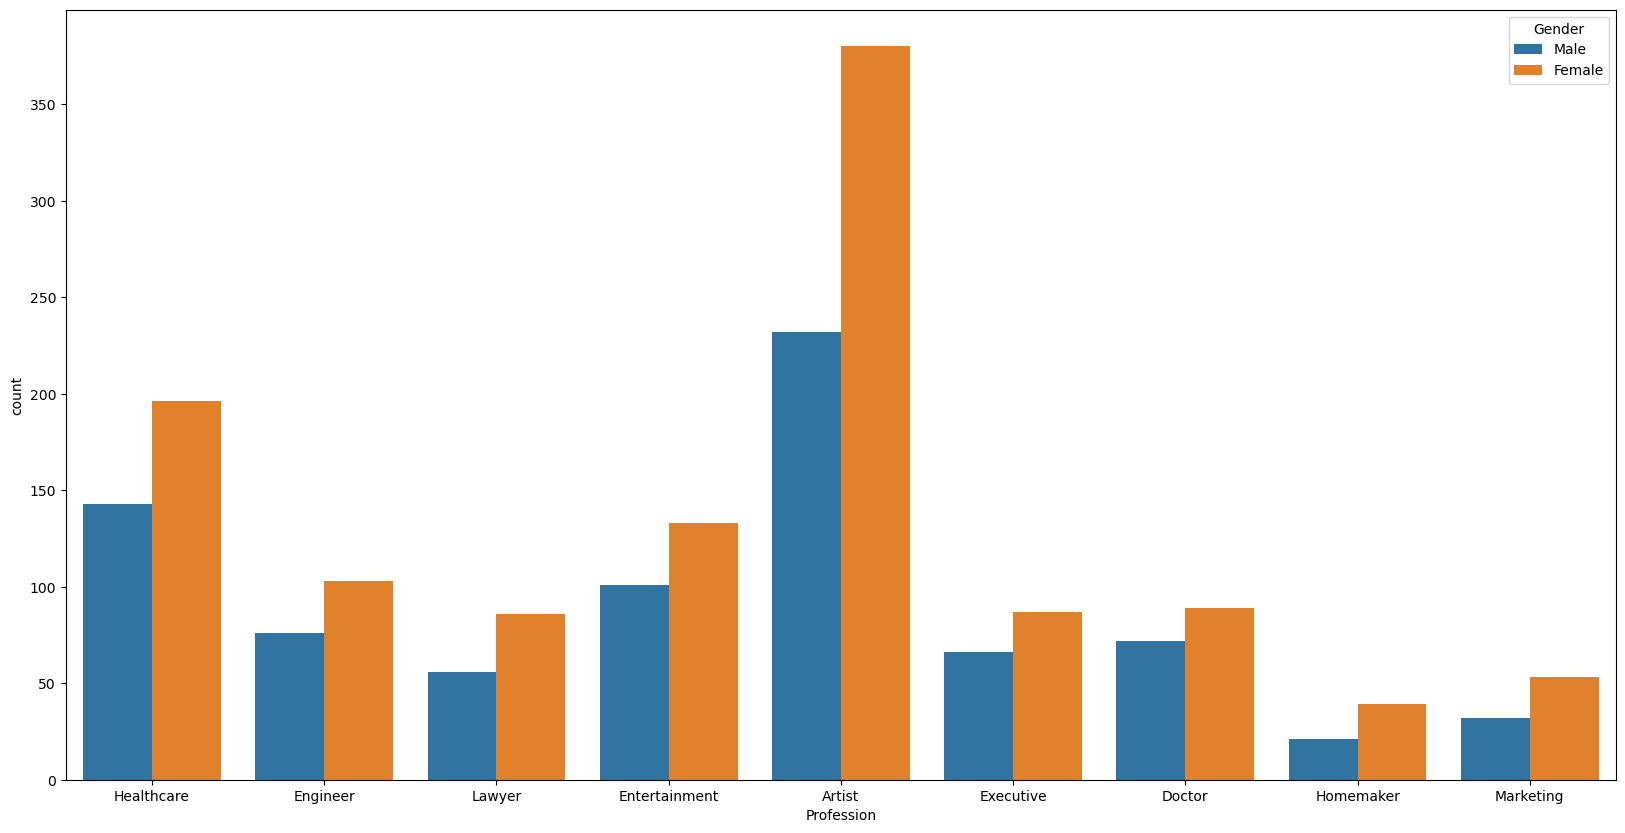

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='Profession',data=df,hue='Gender')

<AxesSubplot:xlabel='Work Experience', ylabel='Annual Income ($)'>

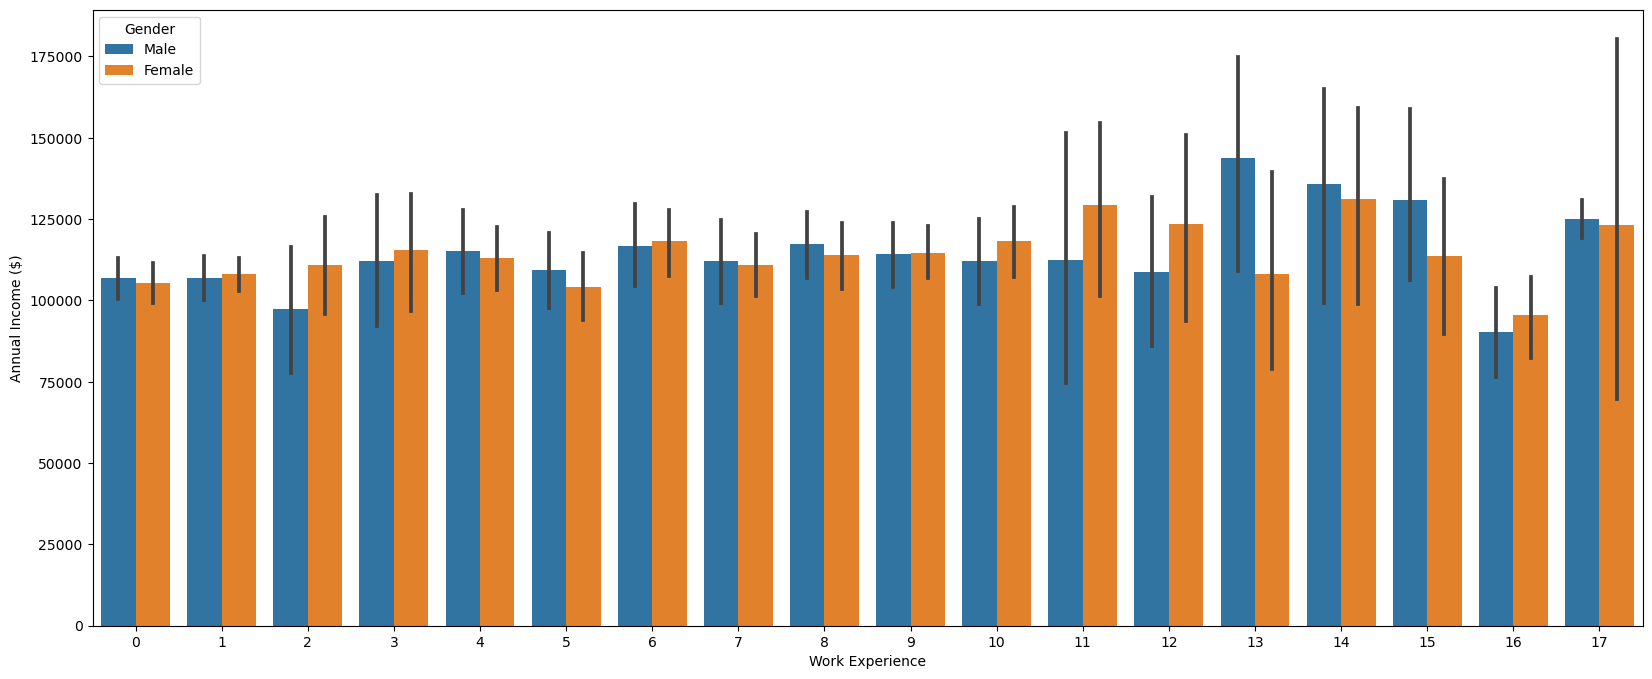

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x='Work Experience',y='Annual Income ($)',data=df,hue='Gender')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Engineer'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Artist'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Doctor'),
  Text(7, 0, 'Homemaker'),
  Text(8, 0, 'Marketing')])

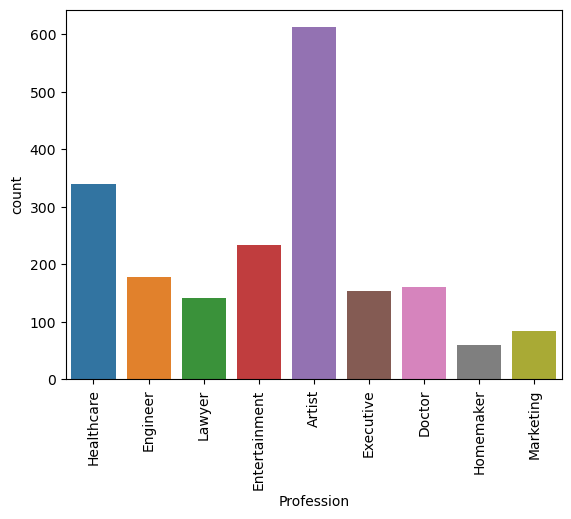

In [16]:
sns.countplot(data=df, x='Profession')
plt.xticks(rotation=90)

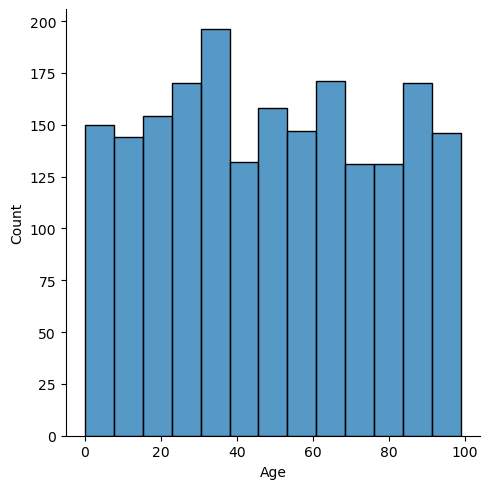

In [20]:
sns.displot(data=df, x='Age')

<AxesSubplot:xlabel='Annual Income ($)', ylabel='Count'>

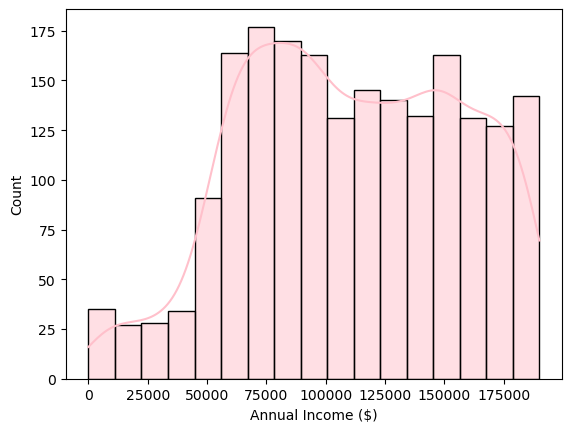

In [23]:
sns.histplot(data=df,x='Annual Income ($)',color='pink',kde=True)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income ($)'>

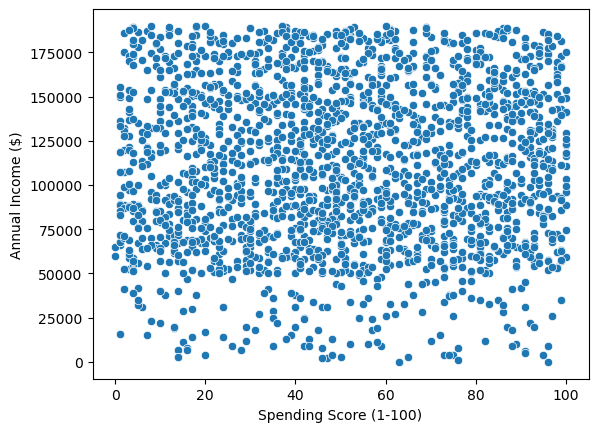

In [24]:
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income ($)')

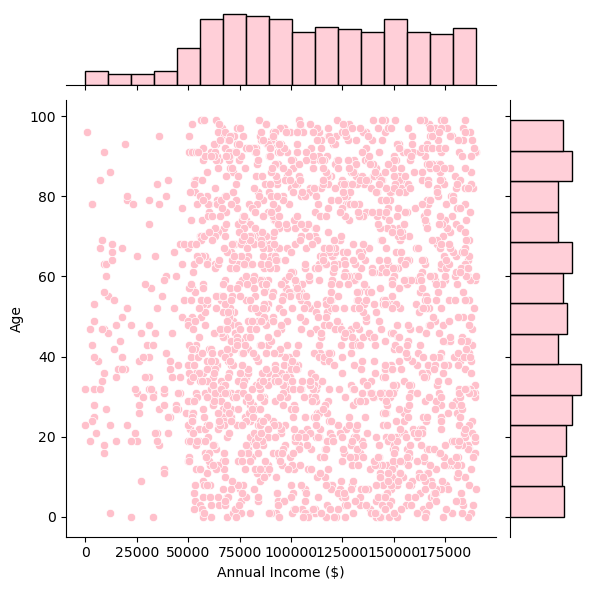

In [26]:
sns.jointplot(x='Annual Income ($)',y='Age',data=df,color='pink')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

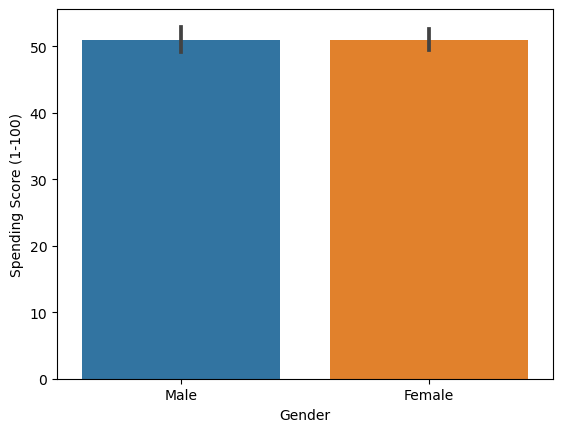

In [27]:
sns.barplot(x='Gender',y='Spending Score (1-100)',data=df)

In [28]:
len(df.index)

2000

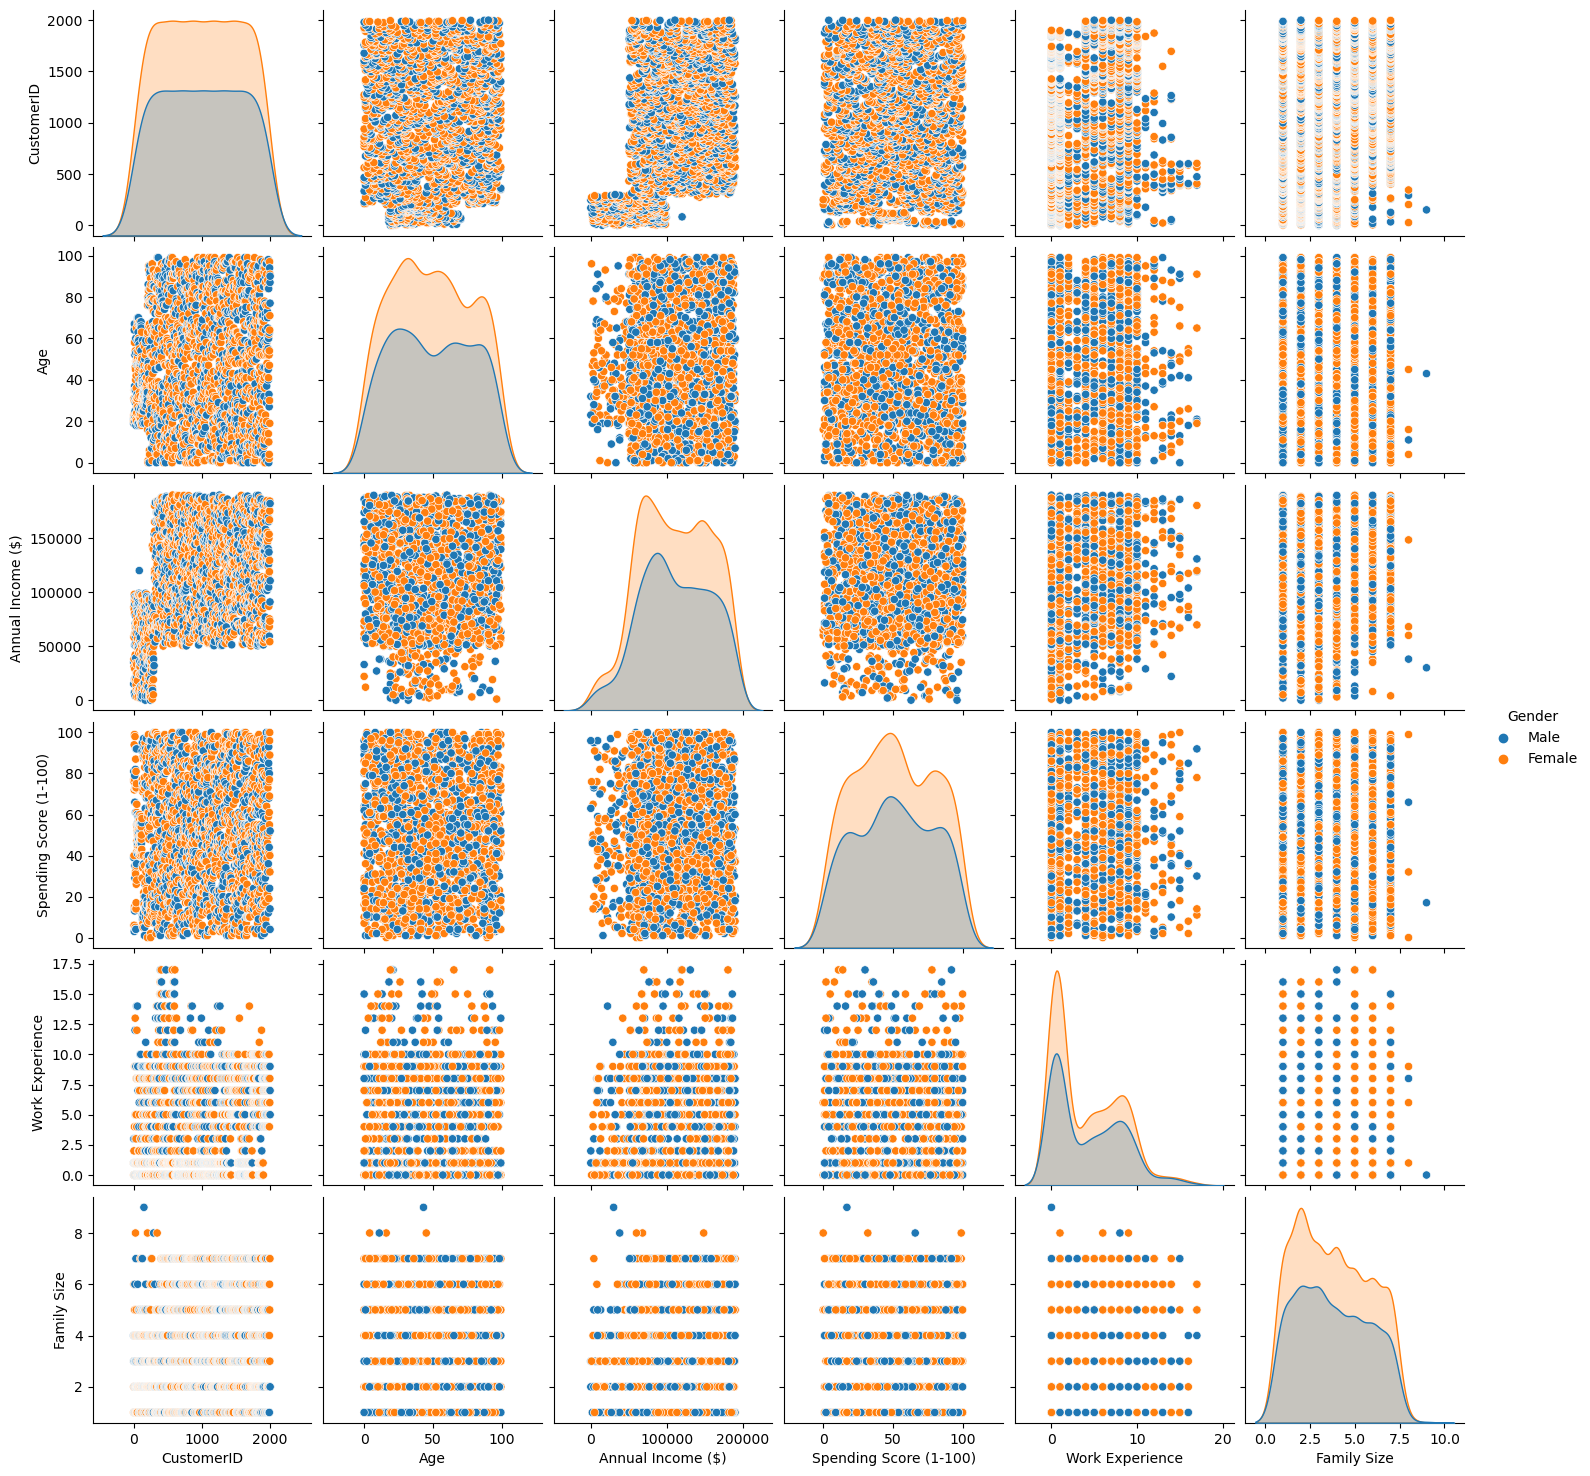

In [29]:
sns.pairplot(data=df,hue='Gender')

In [33]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [32]:
df.dropna(inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [34]:
df['CustomerID'].unique()

array([   1,    2,    3, ..., 1998, 1999, 2000], dtype=int64)

In [35]:
df.drop("CustomerID",axis='columns',inplace=True)
df.sample(3)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
13,Female,24,91000,77,Lawyer,1,1
1213,Female,81,125316,81,Lawyer,0,6
430,Male,1,111558,85,Healthcare,7,4


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
cat_cols=['Gender','Profession']

In [39]:
encoder=LabelEncoder()
for col in cat_cols:
    df[col+'_en']=encoder.fit_transform(df[col])
    

In [40]:
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_en,Profession_en
0,Male,19,15000,39,Healthcare,1,4,1,5
1,Male,21,35000,81,Engineer,3,3,1,2
2,Female,20,86000,6,Engineer,1,1,0,2
3,Female,23,59000,77,Lawyer,0,2,0,7
4,Female,31,38000,40,Entertainment,2,6,0,3


In [44]:
df1=df.drop(cat_cols,axis=1)
df1.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_en,Profession_en
0,19,15000,39,1,4,1,5
1,21,35000,81,3,3,1,2
2,20,86000,6,1,1,0,2
3,23,59000,77,0,2,0,7
4,31,38000,40,2,6,0,3


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [88]:
#Inertia value for optimal hyperparameters using Random Initialisation
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="random")
    kmeans_model.fit(df1)
    inertia_list.append(kmeans_model.inertia_)
inertia_list

[4125861916163.8203,
 1134859196136.3994,
 586979674118.0631,
 357524106631.6466,
 214030599566.95966,
 137885203555.3794,
 106425426840.90417,
 82727111333.76248,
 64759349982.68508,
 51939849608.14657]

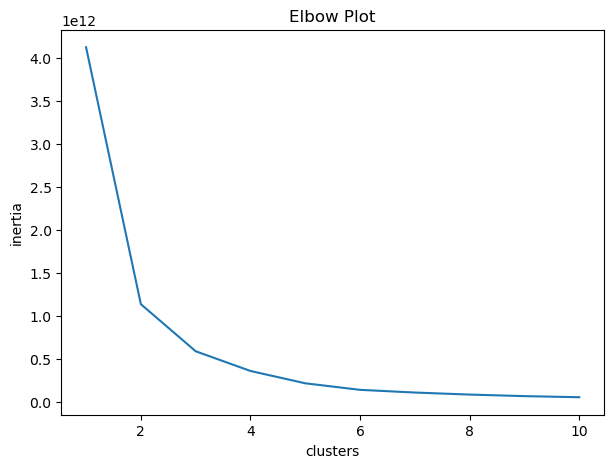

In [89]:
plt.figure(figsize=(7,5))
plt.plot(range(1,11),inertia_list)
plt.title("Elbow Plot")
plt.xlabel("clusters")
plt.ylabel("inertia")
plt.show()

In [90]:
km_3 = KMeans(n_clusters=3, init="random")
km_3.fit(df1)
km_4 = KMeans(n_clusters=4, init="random")
km_4.fit(df1)

KMeans(init='random', n_clusters=4)

In [91]:
y_pred_3 = km_3.predict(df1)
y_pred_4 = km_4.predict(df1)

In [92]:
def comparator(true_lis,lis):
    acc = 0
    for val1,val2 in zip(true_lis,lis):
        if val1 == val2:
            acc += 1
    return acc/len(lis)

In [93]:
#Comparing 2 and 3 cluster predicted results
str(round(comparator(y_pred_3,y_pred_4),2)*100)+"% same result"

'17.0% same result'

In [94]:
k_inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(df1)
    k_inertia_list.append(kmeans_model.inertia_)
k_inertia_list

[4125861916163.8203,
 1134862295468.9397,
 586953972639.3718,
 357531817563.6998,
 213721491548.86798,
 137913137250.09576,
 106739984052.16277,
 82938575741.77313,
 64689013978.55438,
 51473966660.01468]

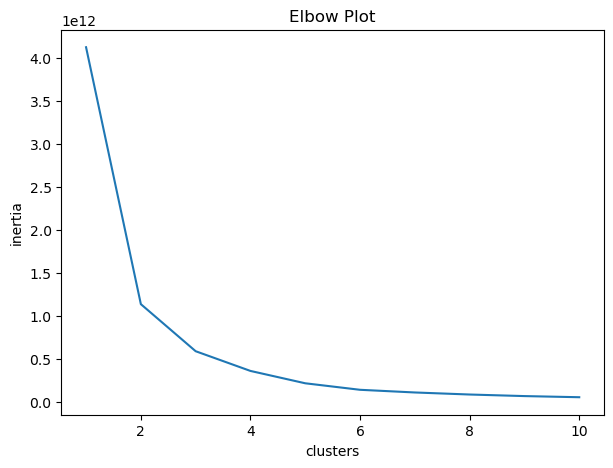

In [95]:
plt.figure(figsize=(7,5))
plt.plot(range(1,11),k_inertia_list)
plt.title("Elbow Plot")
plt.xlabel("clusters")
plt.ylabel("inertia")
plt.show()

In [96]:
km_3 = KMeans(n_clusters=3, init="k-means++")
km_3.fit(df1)
km_4 = KMeans(n_clusters=4, init="k-means++")
km_4.fit(df1)

KMeans(n_clusters=4)

In [97]:
y_pred_3 = km_3.predict(df1)
y_pred_4 = km_4.predict(df1)

In [98]:
def comparator(true_lis,lis):
    acc = 0
    for val1,val2 in zip(true_lis,lis):
        if val1 == val2:
            acc += 1
    return acc/len(lis)

In [99]:
#Comparing 2 and 3 cluster predicted results
str(round(comparator(y_pred_3,y_pred_4),2)*100)+"% same result"

'22.0% same result'